In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [14]:
# download from https://www.kaggle.com/dalpozz/creditcardfraud
creditcard <- read.csv("/Users/jamalbacchus/IdeaProjects/Capstone/Mini Projects/Anomaly Detection/creditcard.csv")

In [15]:
head(creditcard)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


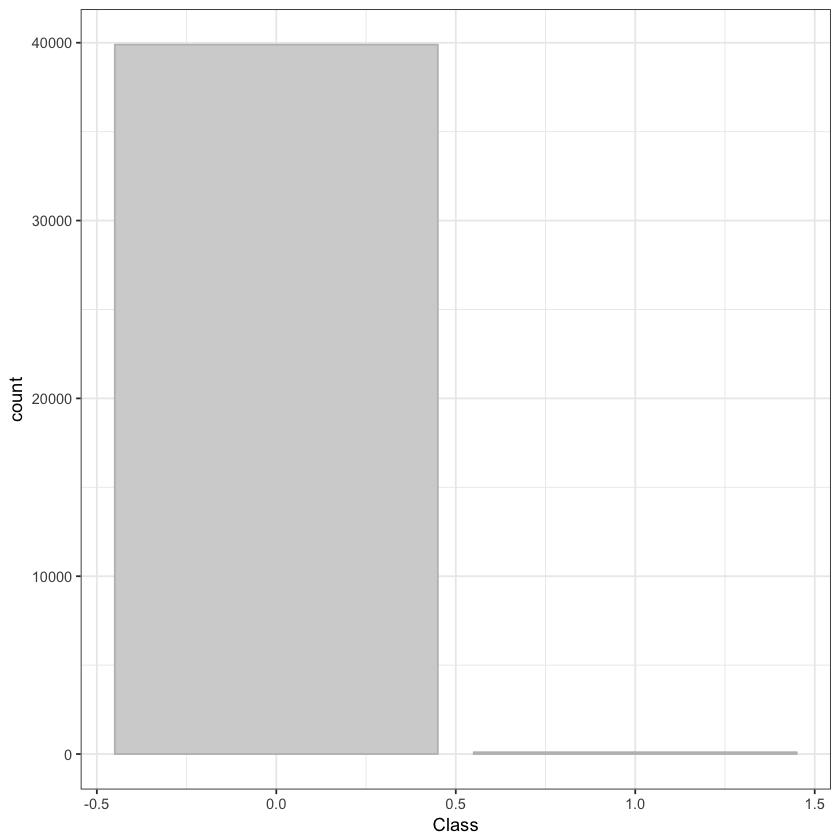

In [5]:
creditcard %>%
  ggplot(aes(x = Class)) +
    geom_bar(color = "grey", fill = "lightgrey") +
    theme_bw()

In [16]:
summary(creditcard$Time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   15012   30717   25610   35731   40052 

In [7]:
# separate transactions by day
creditcard$day <- ifelse(creditcard$Time > 3600 * 24, "day2", "day1")

# make transaction relative to day
creditcard$Time_day <- ifelse(creditcard$day == "day2", creditcard$Time - 86400, creditcard$Time)

summary(creditcard[creditcard$day == "day1", ]$Time_day)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   15012   30717   25610   35731   40052 

In [8]:
summary(creditcard[creditcard$day == "day2", ]$Time_day)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

In [9]:
# bin transactions according to time of day
creditcard$Time <- as.factor(ifelse(creditcard$Time_day <= 38138, "gr1", # mean 1st Qu.
                          ifelse(creditcard$Time_day <= 52327, "gr2", # mean mean
                                 ifelse(creditcard$Time_day <= 69580, "gr3", # mean 3rd Qu
                                        "gr4"))))

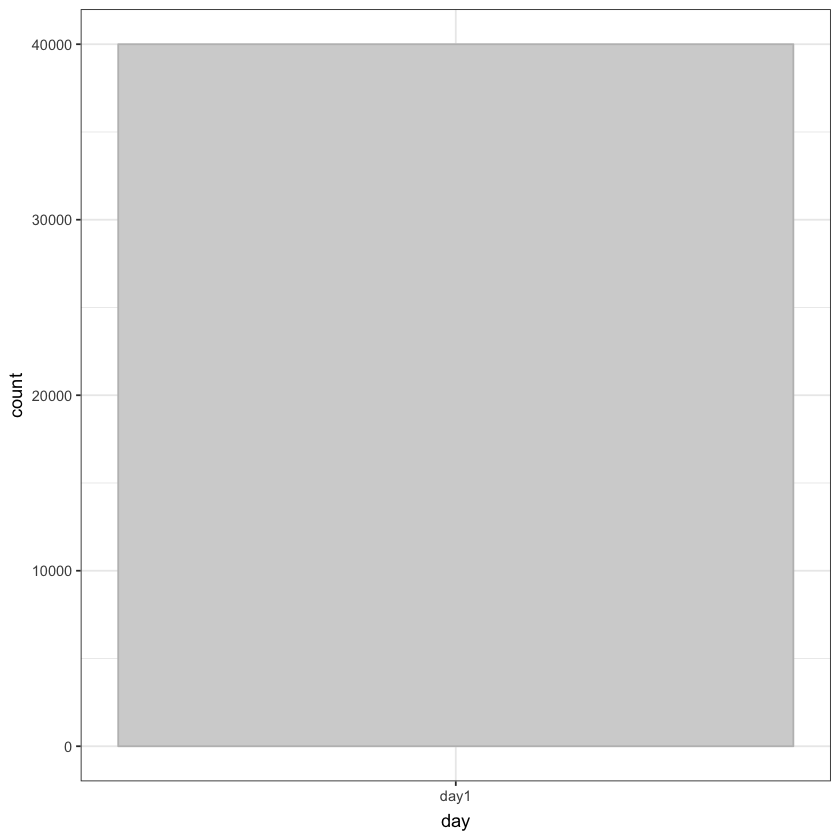

In [10]:
creditcard %>%
  ggplot(aes(x = day)) +
    geom_bar(color = "grey", fill = "lightgrey") +
    theme_bw()

In [11]:
creditcard <- select(creditcard, -Time_day, -day)

# convert class variable to factor
creditcard$Class <- factor(creditcard$Class)

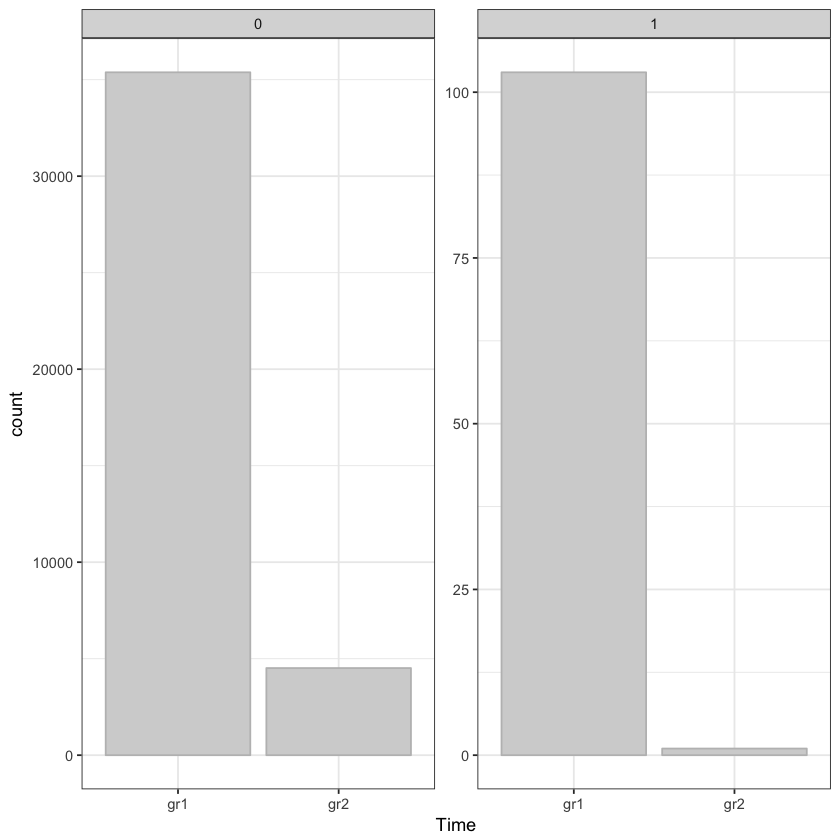

In [12]:
creditcard %>%
  ggplot(aes(x = Time)) +
    geom_bar(color = "grey", fill = "lightgrey") +
    theme_bw() +
    facet_wrap( ~ Class, scales = "free", ncol = 2)

In [11]:
summary(creditcard[creditcard$Class == "0", ]$Amount)

SyntaxError: invalid syntax (<ipython-input-11-cebd2a628fa6>, line 1)

In [12]:
summary(creditcard[creditcard$Class == "1", ]$Amount)

SyntaxError: invalid syntax (<ipython-input-12-5ed1538875e4>, line 1)

In [13]:
creditcard %>%
  ggplot(aes(x = Amount)) +
    geom_histogram(color = "grey", fill = "lightgrey", bins = 50) +
    theme_bw() +
    facet_wrap( ~ Class, scales = "free", ncol = 2)

SyntaxError: invalid syntax (<ipython-input-13-14768bfb05b0>, line 1)

In [14]:
library(h2o)
h2o.init(nthreads = -1)

NameError: name 'library' is not defined

In [15]:
# convert data to H2OFrame
creditcard_hf <- as.h2o(creditcard)

SyntaxError: invalid syntax (<ipython-input-15-36922a8683b5>, line 2)

In [16]:
splits <- h2o.splitFrame(creditcard_hf, 
                         ratios = c(0.4, 0.4), 
                         seed = 42)

train_unsupervised  <- splits[[1]]
train_supervised  <- splits[[2]]
test <- splits[[3]]

response <- "Class"
features <- setdiff(colnames(train_unsupervised), response)

NameError: name 'splits' is not defined

In [17]:
model_nn <- h2o.deeplearning(x = features,
                             training_frame = train_unsupervised,
                             model_id = "model_nn",
                             autoencoder = TRUE,
                             reproducible = TRUE, #slow - turn off for real problems
                             ignore_const_cols = FALSE,
                             seed = 42,
                             hidden = c(10, 2, 10), 
                             epochs = 100,
                             activation = "Tanh")

NameError: name 'model_nn' is not defined

In [18]:
h2o.saveModel(model_nn, path="model_nn", force = TRUE)

NameError: name 'h2o' is not defined

In [19]:
model_nn <- h2o.loadModel("model_nn")
model_nn

NameError: name 'model_nn' is not defined

In [20]:
#Convert to autoencoded representation
test_autoenc <- h2o.predict(model_nn, test)


NameError: name 'test_autoenc' is not defined

In [21]:
train_features <- h2o.deepfeatures(model_nn, train_unsupervised, layer = 2) %>%
  as.data.frame() %>%
  mutate(Class = as.vector(train_unsupervised[, 31]))

SyntaxError: invalid syntax (<ipython-input-21-27b3466af6e4>, line 1)

In [22]:
ggplot(train_features, aes(x = DF.L2.C1, y = DF.L2.C2, color = Class)) +
  geom_point(alpha = 0.1)

SyntaxError: invalid syntax (<ipython-input-22-4fd7acf078d3>, line 1)

In [23]:
# let's take the third hidden layer
train_features <- h2o.deepfeatures(model_nn, train_unsupervised, layer = 3) %>%
  as.data.frame() %>%
  mutate(Class = as.factor(as.vector(train_unsupervised[, 31]))) %>%
  as.h2o()

SyntaxError: invalid syntax (<ipython-input-23-080e318e3727>, line 2)

In [24]:
features_dim <- setdiff(colnames(train_features), response)

NameError: name 'features_dim' is not defined

In [25]:
model_nn_dim <- h2o.deeplearning(y = response,
                               x = features_dim,
                               training_frame = train_features,
                               reproducible = TRUE, #slow - turn off for real problems
                               balance_classes = TRUE,
                               ignore_const_cols = FALSE,
                               seed = 42,
                               hidden = c(10, 2, 10), 
                               epochs = 100,
                               activation = "Tanh")

NameError: name 'model_nn_dim' is not defined

In [26]:
h2o.saveModel(model_nn_dim, path="model_nn_dim", force = TRUE)

NameError: name 'h2o' is not defined

In [27]:
model_nn_dim <- h2o.loadModel("model_nn_dim/DeepLearning_model_R_1493574057843_49")
model_nn_dim

NameError: name 'model_nn_dim' is not defined

In [28]:
test_dim <- h2o.deepfeatures(model_nn, test, layer = 3)

NameError: name 'test_dim' is not defined

In [29]:
h2o.predict(model_nn_dim, test_dim) %>%
  as.data.frame() %>%
  mutate(actual = as.vector(test[, 31])) %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n))

SyntaxError: invalid syntax (<ipython-input-29-84185cd14d11>, line 1)

In [30]:
anomaly <- h2o.anomaly(model_nn, test) %>%
  as.data.frame() %>%
  tibble::rownames_to_column() %>%
  mutate(Class = as.vector(test[, 31]))

mean_mse <- anomaly %>%
  group_by(Class) %>%
  summarise(mean = mean(Reconstruction.MSE))

SyntaxError: invalid syntax (<ipython-input-30-fad7bb419615>, line 1)

In [31]:
ggplot(anomaly, aes(x = as.numeric(rowname), y = Reconstruction.MSE, color = as.factor(Class))) +
  geom_point(alpha = 0.3) +
  geom_hline(data = mean_mse, aes(yintercept = mean, color = Class)) +
  scale_color_brewer(palette = "Set1") +
  labs(x = "instance number",
       color = "Class")

SyntaxError: invalid syntax (<ipython-input-31-98350c64c3cb>, line 1)

In [32]:
anomaly <- anomaly %>%
  mutate(outlier = ifelse(Reconstruction.MSE > 0.02, "outlier", "no_outlier"))

anomaly %>%
  group_by(Class, outlier) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n)) 

SyntaxError: invalid syntax (<ipython-input-32-f5a999d8e1eb>, line 1)

In [33]:
model_nn_2 <- h2o.deeplearning(y = response,
                               x = features,
                               training_frame = train_supervised,
                               pretrained_autoencoder  = "model_nn",
                               reproducible = TRUE, #slow - turn off for real problems
                               balance_classes = TRUE,
                               ignore_const_cols = FALSE,
                               seed = 42,
                               hidden = c(10, 2, 10), 
                               epochs = 100,
                               activation = "Tanh")

NameError: name 'model_nn_2' is not defined

In [34]:
h2o.saveModel(model_nn_2, path="model_nn_2", force = TRUE)

NameError: name 'h2o' is not defined

In [35]:
model_nn_2 <- h2o.loadModel("model_nn_2/DeepLearning_model_R_1493574057843_9")
model_nn_2

NameError: name 'model_nn_2' is not defined

In [36]:
pred <- as.data.frame(h2o.predict(object = model_nn_2, newdata = test)) %>%
  mutate(actual = as.vector(test[, 31]))

SyntaxError: invalid syntax (<ipython-input-36-c495060a4649>, line 1)

In [37]:
pred %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n)) 

SyntaxError: invalid syntax (<ipython-input-37-26192cef5099>, line 1)

In [38]:
pred %>%
  ggplot(aes(x = actual, fill = predict)) +
    geom_bar() +
    theme_bw() +
    scale_fill_brewer(palette = "Set1") +
    facet_wrap( ~ actual, scales = "free", ncol = 2)

SyntaxError: invalid syntax (<ipython-input-38-729bc801ba75>, line 1)

In [39]:
library(ROCR)

# http://stackoverflow.com/questions/24563061/computing-integral-of-a-line-plot-in-r
line_integral <- function(x, y) {
  dx <- diff(x)
  end <- length(y)
  my <- (y[1:(end - 1)] + y[2:end]) / 2
  sum(dx * my)
} 

prediction_obj <- prediction(pred$p1, pred$actual)

SyntaxError: invalid syntax (<ipython-input-39-655797a93055>, line 4)

In [40]:
par(mfrow = c(1, 2))
par(mar = c(5.1,4.1,4.1,2.1))

# precision-recall curve
perf1 <- performance(prediction_obj, measure = "prec", x.measure = "rec") 

x <- perf1@x.values[[1]]
y <- perf1@y.values[[1]]
y[1] <- 0

plot(perf1, main = paste("Area Under the\nPrecision-Recall Curve:\n", round(abs(line_integral(x,y)), digits = 3)))

# sensitivity-specificity curve
perf2 <- performance(prediction_obj, measure = "sens", x.measure = "spec") 

x <- perf2@x.values[[1]]
y <- perf2@y.values[[1]]
y[1] <- 0

plot(perf2, main = paste("Area Under the\nSensitivity-Specificity Curve:\n", round(abs(line_integral(x,y)), digits = 3)))

SyntaxError: invalid syntax (<ipython-input-40-6c74399f54ca>, line 7)

In [41]:
thresholds <- seq(from = 0, to = 1, by = 0.1)
pred_thresholds <- data.frame(actual = pred$actual)

for (threshold in thresholds) {
  
  prediction <- ifelse(pred$p1 > threshold, 1, 0)
  prediction_true <- ifelse(pred_thresholds$actual == prediction, TRUE, FALSE)
  pred_thresholds <- cbind(pred_thresholds, prediction_true)

}

colnames(pred_thresholds)[-1] <- thresholds

SyntaxError: invalid syntax (<ipython-input-41-7fb51dceedc9>, line 1)

In [42]:
pred_thresholds %>%
  gather(x, y, 2:ncol(pred_thresholds)) %>%
  group_by(actual, x, y) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = as.numeric(x), y = n, color = actual)) +
    geom_vline(xintercept = 0.6, alpha = 0.5) +
    geom_line() +
    geom_point(alpha = 0.5) +
    theme_bw() +
    facet_wrap(actual ~ y, scales = "free", ncol = 2) +
    labs(x = "prediction threshold",
         y = "number of instances")


SyntaxError: invalid syntax (<ipython-input-42-8966b22c51e3>, line 1)

In [43]:
pred %>%
  mutate(predict = ifelse(pred$p1 > 0.6, 1, 0)) %>%
  group_by(actual, predict) %>%
  summarise(n = n()) %>%
  mutate(freq = n / sum(n)) 

SyntaxError: invalid syntax (<ipython-input-43-807477aa1b74>, line 1)